<a href="https://colab.research.google.com/github/gu1lleom/Colab-Clases/blob/main/DM_Clase_04_Datos_faltantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imputación de valores faltantes
Datos: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/house_pricing.csv', index_col='Id', na_values='NA')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

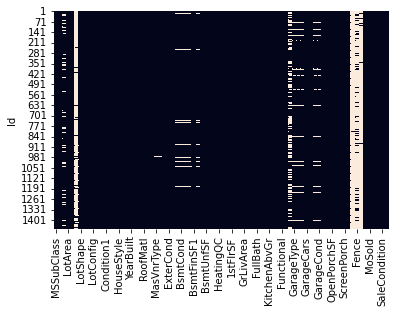

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

## Imputación univariada

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(strategy='mean')
# strategy == mean, median, most_frequent, constant

imp.fit(df_train[['LotFrontage', 'LotArea']])
df_train[['LotFrontage', 'LotArea']] = imp.transform(df_train[['LotFrontage', 'LotArea']])
df_test[['LotFrontage', 'LotArea']] = imp.transform(df_test[['LotFrontage', 'LotArea']])

df[['LotFrontage', 'LotArea']] = imp.fit_transform(df[['LotFrontage', 'LotArea']])
df[['LotFrontage', 'LotArea']].isna().sum()




LotFrontage    0
LotArea        0
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='most_frequent', add_indicator=True) 
imp.fit_transform(df[['FireplaceQu', 'Fence']])

array([['Gd', 'MnPrv', True, True],
       ['TA', 'MnPrv', False, True],
       ['TA', 'MnPrv', False, True],
       ...,
       ['Gd', 'GdPrv', False, False],
       ['Gd', 'MnPrv', True, True],
       ['Gd', 'MnPrv', True, True]], dtype=object)

## Multivariate imputation - MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)  # tiene add_indicator
imp.fit_transform(df[['LotFrontage', 'LotArea', 'PoolArea', 'SalePrice']])

array([[6.50000e+01, 8.45000e+03, 0.00000e+00, 2.08500e+05],
       [8.00000e+01, 9.60000e+03, 0.00000e+00, 1.81500e+05],
       [6.80000e+01, 1.12500e+04, 0.00000e+00, 2.23500e+05],
       ...,
       [6.60000e+01, 9.04200e+03, 0.00000e+00, 2.66500e+05],
       [6.80000e+01, 9.71700e+03, 0.00000e+00, 1.42125e+05],
       [7.50000e+01, 9.93700e+03, 0.00000e+00, 1.47500e+05]])

## Multivariate imputation - KNN

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imp = KNNImputer(n_neighbors=3, weights="distance") # tiene add_indicator
imp.fit_transform(df[['LotFrontage', 'LotArea', 'PoolArea', 'SalePrice']])

array([[6.50000e+01, 8.45000e+03, 0.00000e+00, 2.08500e+05],
       [8.00000e+01, 9.60000e+03, 0.00000e+00, 1.81500e+05],
       [6.80000e+01, 1.12500e+04, 0.00000e+00, 2.23500e+05],
       ...,
       [6.60000e+01, 9.04200e+03, 0.00000e+00, 2.66500e+05],
       [6.80000e+01, 9.71700e+03, 0.00000e+00, 1.42125e+05],
       [7.50000e+01, 9.93700e+03, 0.00000e+00, 1.47500e+05]])

## Indicadores

In [ ]:
from sklearn.impute import MissingIndicator

In [ ]:
ind = MissingIndicator()
mask_missing = ind.fit_transform(df)
mask_missing

array([[False,  True, False, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       ...,
       [False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True]])